<a id='top'></a>
<h1 style="text-align:center;font-size:220%;;">Traitement du langage naturel avec des tweets de catastrophes.</h1>

- ***Mohamed Taleb 25421***
- ***Abd El Kader Moctar 25436***
- ***Namy Ahmed 25394*** 

# I. Description du projet

#### Twitter est l'une des plateformes de médias sociaux les plus dynamiques, où de nombreuses personnes partagent des événements de toute nature. Par exemple, en cas de nouvel incendie à Gaza, presque tout le monde commence à tweeter à ce sujet. Notre projet vise donc à prédire, à partir des tweets, si leur contenu signale une catastrophe ou non. Notre plan Contiendra les cinq étapes suivantes : 
* Importation des bibliothéques nécessaires
* Chargement des données
* Préparation des données
* Entrainement du modèle
* Visualisation des données à l'aide du framework Gradio

### Importation des bibliothéque nécessaires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os
# est utilisé pour les statistiques avancées.
import scipy.stats as stats
# est utilisé pour séparer les données en jeux de données d'entraînement et de test.
from IPython.display import display, Markdown
#est utilisé pour la tokenization, la suppression des mots vides et la lemmatisation.
!pip install spacy
#est utilisé pour construire et entraîner des modèles de réseaux de neurones.
!pip install keras
!pip install keras --upgrade
#est utilisé comme backend pour exécuter les modèles de keras.
!pip install tensorflow
!pip install tensorflow==2.5.0
#est utilisé pour créer des nuages de mots à partir des tweets.
!pip install wordcloud


from sklearn.model_selection import train_test_split

# est utilisé pour évaluer les performances du modèle (classification_report, precision_recall_curve)
from sklearn.metrics import classification_report, precision_recall_curve

#sont utilisés pour nettoyer les données de tweets (supprimer les caractères de ponctuation, les liens web, etc.)
import re
import string

#est utilisé pour afficher une barre de progression pour les boucles longues.
import tqdm

# est utilisé pour la tokenization, la suppression des mots vides, la lemmatisation et la fréquence des mots.
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download()
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#est utilisé pour la tokenization, la suppression des mots vides et la lemmatisation.
from wordcloud import WordCloud, STOPWORDS
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
lemma = WordNetLemmatizer()

#est utilisé pour construire et entraîner des modèles de réseaux de neurones.
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM, Dropout, BatchNormalization,SpatialDropout1D
from keras.layers import Embedding
from keras.initializers import Constant
from keras.optimizers import Adam

  Using cached spacy-3.7.5-cp311-cp311-win_amd64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata (8.6 kB)
  Using cached preshed-3.0.9-cp311-cp311-win_amd64.whl.metadata (2.2 kB)
  Using cached thinc-8.2.5-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached langcodes-3.4.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.2.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached blis-0.7.11-cp311-cp311-win_amd64.whl.metadata (7.6 kB)
  Using cached confection-0.1

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Visiteur\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Visiteur\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Visiteur\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Visiteur\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Visiteur\anaconda3\Lib\http\client.py", line 473, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\Visiteur\anaconda3\Lib\socket.py", line 706, in readinto
    return self._sock.recv_in

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Visiteur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
display(Markdown("# Charger les données"))
display(Markdown("Les données d'entraînement sont stockées dans le DataFrame train, les données de test dans le DataFrame test et les données de soumission dans le DataFrame submission. Les données d'entraînement sont utilisées pour entraîner le modèle, les données de test sont utilisées pour évaluer les performances du modèle et les données de soumission sont utilisées pour soumettre les résultats du modèle à un concours ou à un défi en ligne."))

# Charger les données

Les données d'entraînement sont stockées dans le DataFrame train, les données de test dans le DataFrame test et les données de soumission dans le DataFrame submission. Les données d'entraînement sont utilisées pour entraîner le modèle, les données de test sont utilisées pour évaluer les performances du modèle et les données de soumission sont utilisées pour soumettre les résultats du modèle à un concours ou à un défi en ligne.

In [77]:
df_train= pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [78]:
# Ces lignes de code impriment des informations sur les tailles des DataFrames de données d'entraînement et de test. La fonction shape de pandas renvoie un tuple contenant le nombre de lignes et de colonnes dans un DataFrame.
print('There are {} rows and {} columns in train set'.format(df_train.shape[0],df_train.shape[1]))
print('There are {} rows and {} columns in test set'.format(df_test.shape[0],df_test.shape[1]))

There are 7613 rows and 5 columns in train set
There are 3263 rows and 4 columns in test set


In [79]:
#Cette ligne de code affiche les 10 premières lignes du DataFrame de données 
df_train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [80]:
# Ces lignes de code créent un DataFrame qui contient des informations sur les valeurs manquantes dans le DataFrame de données d'entraînement.
missing_val = pd.DataFrame(df_train.isnull().sum()/len(df_train)*100)
missing_val = missing_val.reset_index()
missing_val

,index,0
0,id,0.000000
1,keyword,0.801261
2,location,33.272035
3,text,0.000000
4,target,0.000000


In [81]:
missing_val = pd.DataFrame(df_train.isnull().sum())
missing_val = missing_val.reset_index()
missing_val

,index,0
0,id,0
1,keyword,61
2,location,2533
3,text,0
4,target,0


In [82]:
#générer des statistiques descriptives sur les données d'entraînement
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7613.0,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.49506,0.0,0.0,0.0,1.0,1.0


In [83]:
display(Markdown(" # Nettoyage et prétraitement des données"))
display(Markdown("Prétraitement des données: Les tweets sont nettoyés en enlevant les caractères spéciaux, les mentions d'utilisateurs, les liens et les hashtags. Les tweets sont également converties en minuscules."))

 # Nettoyage et prétraitement des données

Prétraitement des données: Les tweets sont nettoyés en enlevant les caractères spéciaux, les mentions d'utilisateurs, les liens et les hashtags. Les tweets sont également converties en minuscules.

In [84]:
# pour la partie entrainement (df_train)

In [85]:
# Ces lignes de code définissen t des fonctions pour nettoyer les données de tweets en supprimant les URL, les émoticônes, les balises HTML et la ponctuation.
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def clean_special_characters(text):
    text = re.sub(r'\\x[0-9A-Fa-f]{2}', '', text)  # Enlever les séquences hexadécimales
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Enlever les caractères non-ASCII
    return text

def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Applying helper functions

df_train['clean_text'] = df_train['text'].apply(lambda x: remove_URL(x))
df_train['clean_text'] = df_train['clean_text'].apply(lambda x: remove_emoji(x))
df_train['clean_text'] = df_train['clean_text'].apply(lambda x: remove_html(x))
df_train['clean_text'] = df_train['clean_text'].apply(lambda x: remove_punct(x))
df_train['clean_text'] = df_train['clean_text'].apply(lambda x: clean_special_characters(x))

In [86]:
# tokenizer les tweets nettoyés en utilisant la fonction apply() de pandas.
df_train['tokenized'] = df_train['clean_text'].apply(word_tokenize)

In [87]:
# vérifier si les fonctions de nettoyage et de tokenization ont été correctement appliquées aux données d'entraînement
df_train.head()

,id,keyword,location,text,target,clean_text,tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala..."


In [88]:
# Ces lignes de code utilisent la fonction apply() pour mettre en minuscule les mots retirer les mots de stopwords des tweets tokenizés.
df_train['lower'] = df_train['tokenized'].apply(
    lambda x: [word.lower() for word in x])

In [89]:
# Initialisation du lemmatizer et des stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words('english'))

# Fonction pour lemmatizer après suppression des stop words
def remove_stopwords_and_lemmatize(text):
    words = [word for word in text if word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Application de la fonction à la colonne 'lower'
df_train['no_stopwords_lemmatized'] = df_train['lower'].apply(remove_stopwords_and_lemmatize)

In [90]:
# Cette ligne de code utilise une compréhension de liste pour joindre les mots tokenisés sans stopwords en utilisant espace comme séparateur.
df_train['no_stopwords'] = [' '.join(map(str, l)) for l in df_train['no_stopwords_lemmatized']]

In [91]:
#vérifier si les tweets ont été correctement converti en chaîne de caractères et stockés dans la colonne no_stopwords.
df_train.head()

,id,keyword,location,text,target,clean_text,tokenized,lower,no_stopwords_lemmatized,no_stopwords
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...",deed reason earthquake may allah forgive u,d e e d r e a s o n e a r t h q u a k e ...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada,f o r e s t f i r e n e a r l a r o n ...
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...",resident asked shelter place notified officer ...,r e s i d e n t a s k e d s h e l t e r ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...",13000 people receive wildfire evacuation order...,1 3 0 0 0 p e o p l e r e c e i v e w i ...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...",got sent photo ruby alaska smoke wildfire pour...,g o t s e n t p h o t o r u b y a l a ...


In [92]:
# pour la partie test (df_test)

In [93]:
# ces lignes de code effectuent les mêmes étapes de nettoyage et de tokenization sur les données de test que sur les données d'entraînement. Les fonctions de nettoyage (remove_URL, remove_emoji, remove_html, remove_punct) sont appliquées aux tweets dans le DataFrame de test pour supprimer les informations inutiles.
df_test['clean_text'] = df_test['text'].apply(lambda x: remove_URL(x))
df_test['clean_text'] = df_test['clean_text'].apply(lambda x: remove_emoji(x))
df_test['clean_text'] = df_test['clean_text'].apply(lambda x: remove_html(x))
df_test['clean_text'] = df_test['clean_text'].apply(lambda x: remove_punct(x))
df_test['clean_text'] = df_test['clean_text'].apply(lambda x: clean_special_characters(x))
df_test['tokenized'] = df_test['clean_text'].apply(word_tokenize)

df_test['lower'] = df_test['tokenized'].apply(
    lambda x: [word.lower() for word in x])

# Initialisation du lemmatizer et des stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words('english'))

# Fonction pour lemmatizer après suppression des stop words
def remove_stopwords_and_lemmatize(text):
    words = [word for word in text if word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Application de la fonction à la colonne 'lower'
df_test['no_stopwords_lemmatized'] = df_test['lower'].apply(remove_stopwords_and_lemmatize)

#Cette ligne de code utilise une compréhension de liste pour joindre les mots tokenisés sans stopwords en utilisant espace comme séparateur.
df_test['no_stopwords'] = [' '.join(map(str, l)) for l in df_test['no_stopwords_lemmatized']]


In [94]:
df_test.head(20)

,id,keyword,location,text,clean_text,tokenized,lower,no_stopwords_lemmatized,no_stopwords
0,0,NaN,NaN,Just happened a terrible car crash,Just happened a terrible car crash,"[Just, happened, a, terrible, car, crash]","[just, happened, a, terrible, car, crash]",happened terrible car crash,h a p p e n e d t e r r i b l e c a r c ...
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",Heard about earthquake is different cities sta...,"[Heard, about, earthquake, is, different, citi...","[heard, about, earthquake, is, different, citi...",heard earthquake different city stay safe ever...,h e a r d e a r t h q u a k e d i f f e r ...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...,"[there, is, a, forest, fire, at, spot, pond, g...","[there, is, a, forest, fire, at, spot, pond, g...",forest fire spot pond goose fleeing across str...,f o r e s t f i r e s p o t p o n d g ...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires,"[Apocalypse, lighting, Spokane, wildfires]","[apocalypse, lighting, spokane, wildfires]",apocalypse lighting spokane wildfire,a p o c a l y p s e l i g h t i n g s p o ...
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills 28 in China and Taiwan,"[Typhoon, Soudelor, kills, 28, in, China, and,...","[typhoon, soudelor, kills, 28, in, china, and,...",typhoon soudelor kill 28 china taiwan,t y p h o o n s o u d e l o r k i l l 2 ...
5,12,NaN,NaN,We're shaking...It's an earthquake,Were shakingIts an earthquake,"[Were, shakingIts, an, earthquake]","[were, shakingits, an, earthquake]",shakingits earthquake,s h a k i n g i t s e a r t h q u a k e
6,21,NaN,NaN,They'd probably still show more life than Arse...,Theyd probably still show more life than Arsen...,"[Theyd, probably, still, show, more, life, tha...","[theyd, probably, still, show, more, life, tha...",theyd probably still show life arsenal yesterd...,t h e y d p r o b a b l y s t i l l s h ...
7,22,NaN,NaN,Hey! How are you?,Hey How are you,"[Hey, How, are, you]","[hey, how, are, you]",hey,h e y
8,27,NaN,NaN,What a nice hat?,What a nice hat,"[What, a, nice, hat]","[what, a, nice, hat]",nice hat,n i c e h a t
9,29,NaN,NaN,Fuck off!,Fuck off,"[Fuck, off]","[fuck, off]",fuck,f u c k


In [95]:
# Cette ligne de code utilise la fonction tolist() pour convertir les colonnes 'no_stopwords' des dataframes d'entraînement et de test en listes de chaînes de caractères.
combined = df_train['no_stopwords'].tolist() + df_test['no_stopwords'].tolist()

In [96]:
combined

['d e e d   r e a s o n   e a r t h q u a k e   m a y   a l l a h   f o r g i v e   u',
 'f o r e s t   f i r e   n e a r   l a   r o n g e   s a s k   c a n a d a',
 'r e s i d e n t   a s k e d   s h e l t e r   p l a c e   n o t i f i e d   o f f i c e r   e v a c u a t i o n   s h e l t e r   p l a c e   o r d e r   e x p e c t e d',
 '1 3 0 0 0   p e o p l e   r e c e i v e   w i l d f i r e   e v a c u a t i o n   o r d e r   c a l i f o r n i a',
 'g o t   s e n t   p h o t o   r u b y   a l a s k a   s m o k e   w i l d f i r e   p o u r s   s c h o o l',
 'r o c k y f i r e   u p d a t e   c a l i f o r n i a   h w y   2 0   c l o s e d   d i r e c t i o n   d u e   l a k e   c o u n t y   f i r e   c a f i r e   w i l d f i r e',
 'f l o o d   d i s a s t e r   h e a v y   r a i n   c a u s e   f l a s h   f l o o d i n g   s t r e e t   m a n i t o u   c o l o r a d o   s p r i n g   a r e a',
 'i m   t o p   h i l l   s e e   f i r e   w o o d',
 't h e r e   e m e r g e n 

In [97]:
# nombre total de tweets dans les données d'entraînement et de test combinées.
len(combined)

10876

In [98]:
display(Markdown("# L'analyse exploratoire des données"))
display(Markdown(""))

# L'analyse exploratoire des données

In [99]:
display(Markdown("### Figure 1 : Comparaison entre tweet catastrophe et pas catastrophe"))


### Figure 1 : Comparaison entre tweet catastrophe et pas catastrophe

C:\Users\hamad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


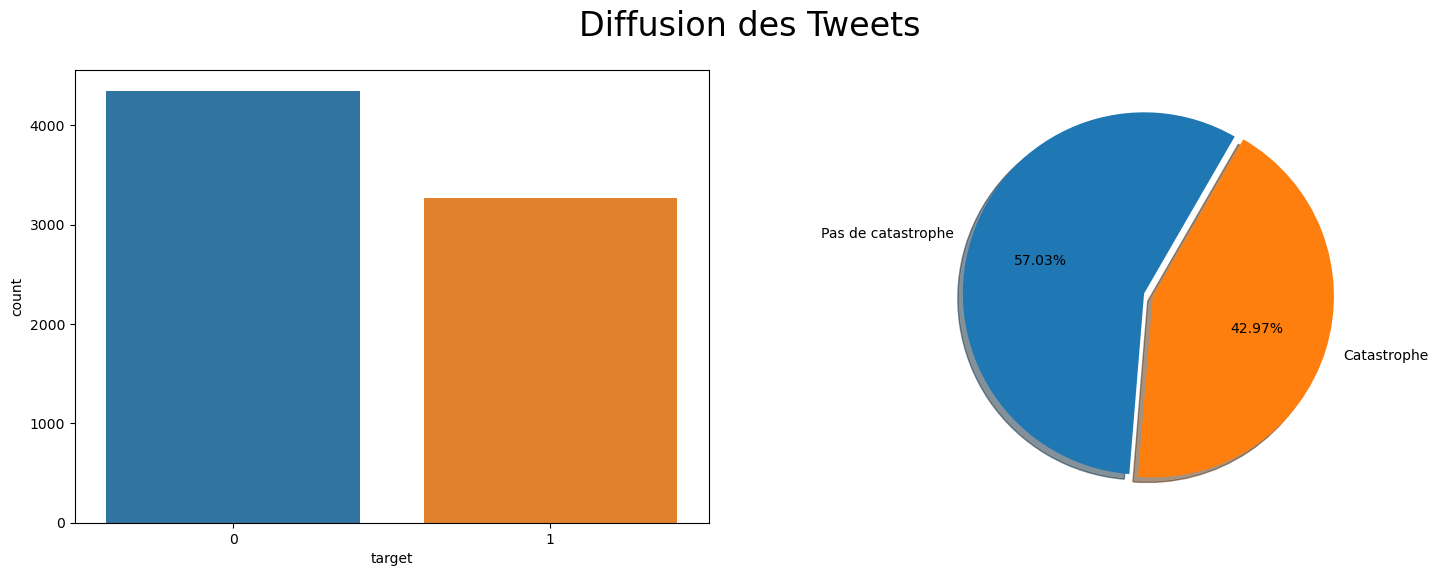

In [100]:
# visualiser la répartition des cibles dans les données d'entraînement.

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
sns.countplot(df_train['target'], ax=axes[0])
axes[1].pie(df_train['target'].value_counts(),
            labels=['Pas de catastrophe', 'Catastrophe'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Diffusion des Tweets', fontsize=24)
plt.show()

In [101]:
display(Markdown("### Figure 2 : Top 20 des mots clés les plus courants par catégorie"))

### Figure 2 : Top 20 des mots clés les plus courants par catégorie

C:\Users\hamad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hamad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


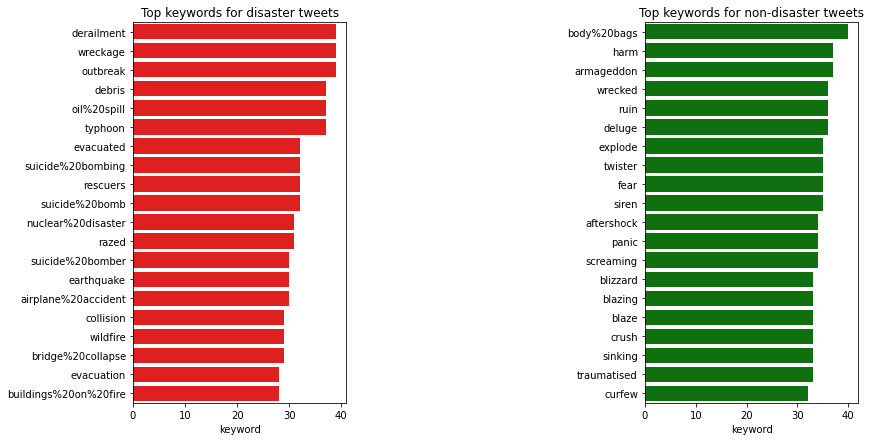

In [102]:
kw_d = df_train[df_train['target']==1].keyword.value_counts().head(20)
kw_nd = df_train[df_train['target']==0].keyword.value_counts().head(20)

plt.figure(figsize=(13,7))

plt.subplot(131)
sns.barplot(kw_d, kw_d.index, color='r')
plt.title('Top keywords for disaster tweets')

plt.subplot(133)
sns.barplot(kw_nd, kw_nd.index, color='g')
plt.title('Top keywords for non-disaster tweets')

plt.show()

In [103]:
display(Markdown("### Figure 3 : Top 10 des lieux les plus courants d'où ont été envoyés les tweets"))

### Figure 3 : Top 10 des lieux les plus courants d'où ont été envoyés les tweets

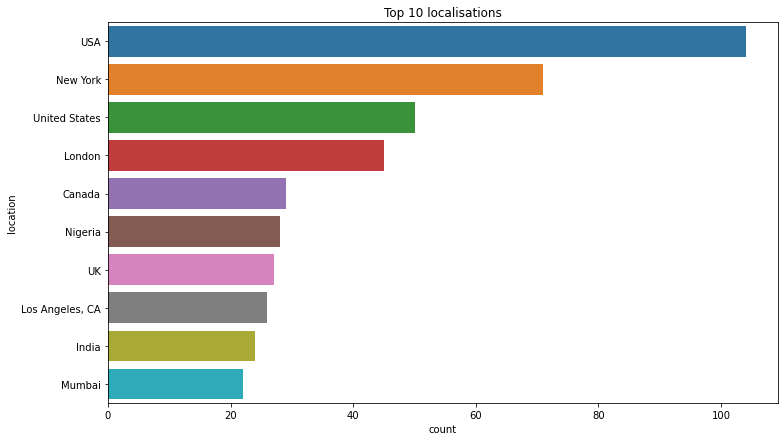

In [104]:
# Lieux les plus courants
plt.figure(figsize=(12,7))
sns.countplot(y=df_train['location'], order = df_train['location'].value_counts().iloc[:10].index)
plt.title('Top 10 localisations')
plt.show()

In [105]:
display(Markdown("# Nuage de mots pour tous les tweets catastrophe"))
display(Markdown(""))

# Nuage de mots pour tous les tweets catastrophe

In [106]:
# stocker un ensemble de mots de stopwords en anglais dans une variable appelée stopwords.
import nltk
stopwords = set(nltk.corpus.stopwords.words('english'))

In [107]:
# Chemin vers une police TrueType (utilisez une police par défaut si non spécifiée)
font_path = 'C:/Users/hamad/Downloads/arial.ttf'

In [108]:
# Spécifiez le chemin de la police TrueType (ajustez le chemin si nécessaire)
font_path = 'C:/Windows/Fonts/DejaVuSans.ttf'  # ou le chemin vers votre fichier TTF

In [109]:
display(Markdown("### Figure 4 :  Mots dans un tweet traité "))
display(Markdown(""))

### Figure 4 :  Mots dans un tweet traité 

In [110]:
pip install --upgrade pillow

Note: you may need to restart the kernel to use updated packages.


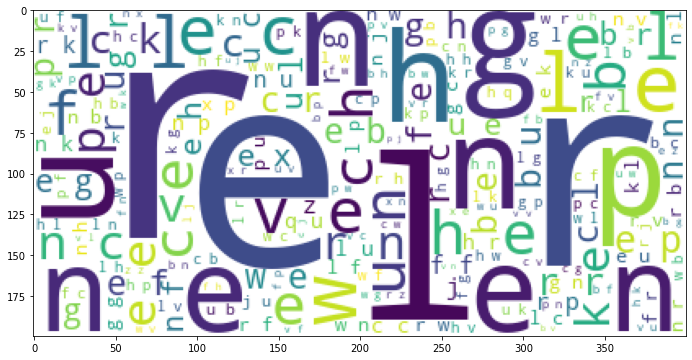

In [111]:
#  nuage de mots à partir des tweets de catastrophe dans les données d'entraînement
from wordcloud import WordCloud
plt.figure(figsize=(12,6))
text = ' '.join(df_train.no_stopwords[df_train['target']==1])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

In [112]:
display(Markdown("### Figure 5 :  Mots dans un tweet traité "))
display(Markdown(""))

### Figure 5 :  Mots dans un tweet traité 

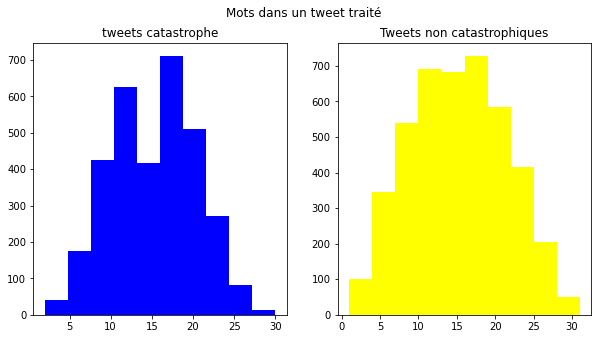

In [113]:
# histogrammes pour visualiser la distribution de la longueur des tweets de catastrophe et des tweets non de catastrophe dans les données d'entraînement
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df_train[df_train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('tweets catastrophe')
tweet_len=df_train[df_train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='yellow')
ax2.set_title('Tweets non catastrophiques')
fig.suptitle('Mots dans un tweet traité')
plt.show()

In [114]:
display(Markdown("### Figure 6 :  Mots dans un tweet traité et normalisé "))
display(Markdown(""))

### Figure 6 :  Mots dans un tweet traité et normalisé 

C:\Users\hamad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hamad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Longueur moyenne des mots dans chaque tweet traité')

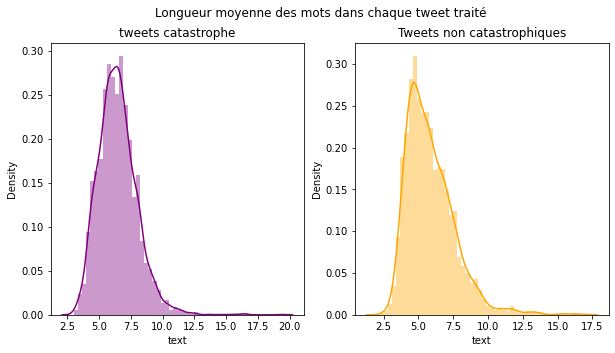

In [115]:
#histogrammes montrent la répartition de la longueur des mots dans les tweets de catastrophe et non de catastrophe dans les données d'entraînement
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_train[df_train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='purple')
ax1.set_title('tweets catastrophe')
word=df_train[df_train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='orange')
ax2.set_title('Tweets non catastrophiques')
fig.suptitle('Longueur moyenne des mots dans chaque tweet traité')

In [116]:
display(Markdown("# Création de l'intégration de nos tweets à l'aide des intégrations GloVe :"))
display(Markdown(""))

# Création de l'intégration de nos tweets à l'aide des intégrations GloVe :

In [117]:
df_train.head()

,id,keyword,location,text,target,clean_text,tokenized,lower,no_stopwords_lemmatized,no_stopwords
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...",deed reason earthquake may allah forgive u,d e e d r e a s o n e a r t h q u a k e ...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada,f o r e s t f i r e n e a r l a r o n ...
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...",resident asked shelter place notified officer ...,r e s i d e n t a s k e d s h e l t e r ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...",13000 people receive wildfire evacuation order...,1 3 0 0 0 p e o p l e r e c e i v e w i ...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...",got sent photo ruby alaska smoke wildfire pour...,g o t s e n t p h o t o r u b y a l a ...


In [118]:
# Ces lignes de code utilisent le fichier de vecteurs pré-entraînés GloVe (Global Vectors for Word Representation) pour créer un index d'incorporations de mots.
import zipfile
import numpy as np

# Décompression du fichier zip
with zipfile.ZipFile('C:/Users/hamad/OneDrive/Bureau/python_project/datas/glove.twitter.27B.zip', 'r') as zip_ref:
    zip_ref.extractall('C:/Users/hamad/OneDrive/Bureau/python_project/datas/glove_twitter')

# Chemin vers le fichier décompressé (ajustez le nom du fichier si nécessaire)
glove_file_path = 'C:/Users/hamad/OneDrive/Bureau/python_project/datas/glove_twitter/glove.twitter.27B.200d.txt'

# Chargement des embeddings
embeddings_index = dict()
with open(glove_file_path, encoding='latin-1', errors='ignore') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except ValueError:
            print(f"Skipping line due to ValueError: {line}")

print(f'Loaded {len(embeddings_index)} word vectors.')

KeyboardInterrupt: 

In [ ]:
#convertir les tweets en vecteurs pour une utilisation dans les modèles de traitement de langage naturel.
!pip install --upgrade keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len_tweet = 50

tok = Tokenizer()
tok.fit_on_texts(combined)
vocab_size = len(tok.word_index) + 1
encoded_tweet = tok.texts_to_sequences(combined)
padded_tweet = pad_sequences(encoded_tweet, maxlen=max_len_tweet, padding='post')

vocab_size = len(tok.word_index) + 1 
embedding_dim = 200
tweet_embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tok.word_index.items():
    t_embedding_vector = embeddings_index.get(word)
    if t_embedding_vector is not None:
        tweet_embedding_matrix[i] = t_embedding_vector

In [ ]:
display(Markdown("# Création du modèle"))

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Construire le modèle LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[tweet_embedding_matrix], input_length=max_len_tweet, trainable=False))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
# Entraîner le modèle
history = model.fit(padded_tweet[:7613], df_train['target'].values, epochs=11, validation_split=0.2)

In [ ]:
# compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss

In [ ]:
display(Markdown("### Figure 7 : Visualisation train / Valid Accuracy"))

In [ ]:
model_loss[['accuracy','loss']].plot(ylim=[0,1])
plt.legend(loc='lower right')
print()

In [ ]:
# Courbes d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
display(Markdown("# Ensemble de test"))
display(Markdown(""))

In [ ]:
# visualiser les 5 premières lignes du Dataframe test
df_test.head()

In [ ]:
display(Markdown("# Evaluation du modèle"))


In [ ]:
# Utilise le modèle entraîné précédemment pour faire des prédictions sur les tweets de test. Ces prédictions sont des valeurs comprises entre 0 et 1 qui indiquent la probabilité que le tweet soit considéré comme étant un tweet de catastrophe.
preds = model.predict(padded_tweet[7613:])

In [ ]:
# afficher les 20 premières valeurs de la variable preds qui contient les prédictions du modèle pour les tweets de test.
preds[:20]

In [ ]:
preds

In [ ]:
len(preds)

In [ ]:
#  redimensionne le tableau en un vecteur 1D de longueur 3263, qui correspond au nombre de tweets de test
# pred=[1 if i>0.5 else 0 for i in preds]
pred = np.round(preds).astype(int).reshape(len(preds))

In [ ]:
pred

In [ ]:
# crée un nouveau Dataframe vide nommé submission qui servira à stocker les prédictions pour les tweets de test.
submission = pd.DataFrame({'id': df_test['id'], 'target': pred})

In [ ]:
submission.head(10)

In [ ]:
#enregistre le Dataframe submission dans un fichier csv nommé submission4.csv
submission.to_csv('submission4.csv',index=True)

In [ ]:
!pip install gradio

In [ ]:
# Interface Gradio
import gradio as gr

# Fonction de prédiction améliorée
def predict_disaster(text):
    # Prétraiter le tweet
    tweet_seq = tok.texts_to_sequences([text])
    tweet_pad = pad_sequences(tweet_seq, maxlen=max_len_tweet, padding='post')
    
    # Faire une prédiction
    pred = model.predict(tweet_pad)
    return "Catastrophe" if pred[0][0] >= 0.5 else "Non Catastrophe"

# Interface Gradio
interface = gr.Interface(
    fn=predict_disaster, 
    inputs=gr.Textbox(lines=2, placeholder="Entrer un tweet"), 
    outputs=gr.Label()
)

# Lancer l'interface
interface.launch()